# **Premier projet : Construction d'un Score Éditorial Anime**

---

### Objectif du Notebook

Le but de ce notebook est de répondre à une question simple qui tourmente la communauté otaku depuis pourtant tant d'années :

> ## **"Quel est le meilleur animé ayant jamais existé ?"** 

Nous essayerons dans ce notebook de trouver la **solution de notation la plus juste et la plus représentative** de la qualité d'une œuvre.

---

## **Première étape : Récupération des données et importations des bibliothèques nécessaires.**

In [33]:
import pandas as pd

df = pd.read_csv('animes.csv')


In [34]:
df.head()

,Anime,Genre_Tags,Source,Nb_Episodes,Status,Studio,Date_Pub,Note_Globale,Note_Meilleur_Ep,Meilleur_Ep_Titre,Comm_Meilleur_Ep,Note_Pire_Ep,Pire_Ep_Titre,Comm_Pire_Ep,Comm_Saison_1,Comm_Saison_2,Comm_Saison_3
0,Naruto,Action / Shonen,Manga,220,Fini,Studio Pierrot,2002-10-03,8.4,9.6,Ep 133: Le cri des larmes,Animation fluide et combat viscéral incroyable.,5.8,Ep 26: Journal de Konoha (Recap),"Remplissage inutile, à sauter.","Arc Zabuza très émouvant, bases solides.",Examen Chuunin introduit une tension sombre.,Combat Lee vs Gaara légendaire.
1,Trigun,Sci-Fi / Action,Manga,26,Fini,Madhouse,1998-04-01,8.2,9.1,Ep 24: Le péché (Sin),"Conclusion tragique de l'arc Wolfwood, émotion...",6.5,Ep 13: Vash the Stampede (Recap),Résumé de mi-saison qui casse le rythme.,"Début western comique, Vash joue l'idiot.",Virage dramatique sombre avec les Gung-Ho Guns.,Révélations philosophiques sur le passé et Kni...
2,Dragon Ball Z,Action / Shonen,Manga,291,Fini,Toei Animation,1989-04-26,8.7,9.4,Ep 237: Le sacrifice d'un père,"Rédemption ultime de Vegeta, sommet émotionnel.",5.9,Ep 39: Amis ou ennemis (Fake Namek),"Filler ennuyeux sur une fausse planète, inutile.",Introduction des Saiyans et codes du Shonen po...,Aventure spatiale et tension tactique sur Namek.,"Transformation Super Saiyan iconique, combat é..."
3,Fullmetal Alchemist: Brotherhood,Aventure / Military,Manga,64,Fini,Bones,2009-04-05,9.1,9.6,Ep 63: De l'autre côté de la porte,"Sacrifice thématique parfait, conclusion magis...",6.3,Ep 27: Intermède (Recap),Episode récapitulatif cassant le rythme.,"Début effréné, traumatisme Nina Tucker marquant.",Complot politique et Mustang brille contre Lust.,"Ambiance militaire froide à Briggs, tension mo..."
4,Cowboy Bebop,Sci-Fi / Noir,Original,26,Fini,Sunrise,1998-04-03,8.8,9.7,Ep 26: The Real Folk Blues Pt.2,Fin poétique et iconique. Bang.,7.2,Ep 23: Boogie Woogie Feng Shui,Intrigue faible et rythme un peu mou.,Formation de l'équipe et choc visuel à l'église.,Exploration mélancolique du passé (Jupiter Jazz).,Confrontation fatale avec le Syndicat et Vicious.


In [35]:
df.shape

(61, 17)

In [36]:
df.describe()

,Nb_Episodes,Note_Globale,Note_Meilleur_Ep,Note_Pire_Ep
count,61.000000,61.000000,61.000000,61.000000
mean,90.737705,8.316393,9.318033,6.719672
std,162.055227,0.521594,0.469932,1.369650
min,3.000000,6.000000,8.200000,0.000000
25%,24.000000,8.100000,9.100000,6.200000
50%,37.000000,8.400000,9.400000,7.200000
75%,76.000000,8.600000,9.700000,7.500000
max,1090.000000,9.300000,9.900000,8.400000


## **Deuxième étape : Nettoyage des données**

On regarde d'abord s'il y a des valeurs manquantes et le type de chaque colonne.

In [37]:
df.isna().sum()

Anime                 0
Genre_Tags            0
Source                0
Nb_Episodes           0
Status                0
Studio                0
Date_Pub              0
Note_Globale          0
Note_Meilleur_Ep      0
Meilleur_Ep_Titre     0
Comm_Meilleur_Ep      0
Note_Pire_Ep          0
Pire_Ep_Titre         0
Comm_Pire_Ep          0
Comm_Saison_1         0
Comm_Saison_2         0
Comm_Saison_3        10
dtype: int64

In [38]:
df.isna().mean() * 100

Anime                 0.000000
Genre_Tags            0.000000
Source                0.000000
Nb_Episodes           0.000000
Status                0.000000
Studio                0.000000
Date_Pub              0.000000
Note_Globale          0.000000
Note_Meilleur_Ep      0.000000
Meilleur_Ep_Titre     0.000000
Comm_Meilleur_Ep      0.000000
Note_Pire_Ep          0.000000
Pire_Ep_Titre         0.000000
Comm_Pire_Ep          0.000000
Comm_Saison_1         0.000000
Comm_Saison_2         0.000000
Comm_Saison_3        16.393443
dtype: float64

In [39]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Anime              61 non-null     str    
 1   Genre_Tags         61 non-null     str    
 2   Source             61 non-null     str    
 3   Nb_Episodes        61 non-null     int64  
 4   Status             61 non-null     str    
 5   Studio             61 non-null     str    
 6   Date_Pub           61 non-null     str    
 7   Note_Globale       61 non-null     float64
 8   Note_Meilleur_Ep   61 non-null     float64
 9   Meilleur_Ep_Titre  61 non-null     str    
 10  Comm_Meilleur_Ep   61 non-null     str    
 11  Note_Pire_Ep       61 non-null     float64
 12  Pire_Ep_Titre      61 non-null     str    
 13  Comm_Pire_Ep       61 non-null     str    
 14  Comm_Saison_1      61 non-null     str    
 15  Comm_Saison_2      61 non-null     str    
 16  Comm_Saison_3      51 non-null     str 

On observe que des valeurs sont manquantes pour les commentaires des saisons 3 (certaines séries n'ayant tout simplement que 2 saisons). On va donc corriger ça. On va aussi transformer le format de la Date de publication qui est en string pour la mettre en datetime.
Enfin, une chose qui m'ennuie en regardant le dataset, c'est que les tags sont joints. C'est à dire que "Action / Shonen" sera traité différement de "Action / Sci Fi". Le tag "Action" ne sera pas compté une fois mais deux. Nous allons donc séparer les tags.

In [40]:
df['Date_Pub'] = pd.to_datetime(df['Date_Pub'])
genres_split = df['Genre_Tags'].str.get_dummies(sep=' / ')
df['Comm_Saison_3'] = df['Comm_Saison_3'].fillna("Aucun")


In [41]:
df = df.drop_duplicates(subset=['Anime'], keep='first').reset_index(drop=True)

print(f"Nettoyage fait ! Il reste {len(df)} animés uniques.")

Nettoyage fait ! Il reste 59 animés uniques.


Maintenant que le dataset est nettoyé, on va ajouter de nouvelles features pour approfondir notre compréhension du dataset :

In [42]:
import numpy as np

df['Ecart'] = df['Note_Meilleur_Ep'] - df['Note_Pire_Ep']
df['Regularite'] = 10 - df['Ecart']

df['Longueur'] = np.log(df['Nb_Episodes'])

df.head()

,Anime,Genre_Tags,Source,Nb_Episodes,Status,Studio,Date_Pub,Note_Globale,Note_Meilleur_Ep,Meilleur_Ep_Titre,Comm_Meilleur_Ep,Note_Pire_Ep,Pire_Ep_Titre,Comm_Pire_Ep,Comm_Saison_1,Comm_Saison_2,Comm_Saison_3,Ecart,Regularite,Longueur
0,Naruto,Action / Shonen,Manga,220,Fini,Studio Pierrot,2002-10-03,8.4,9.6,Ep 133: Le cri des larmes,Animation fluide et combat viscéral incroyable.,5.8,Ep 26: Journal de Konoha (Recap),"Remplissage inutile, à sauter.","Arc Zabuza très émouvant, bases solides.",Examen Chuunin introduit une tension sombre.,Combat Lee vs Gaara légendaire.,3.8,6.2,5.393628
1,Trigun,Sci-Fi / Action,Manga,26,Fini,Madhouse,1998-04-01,8.2,9.1,Ep 24: Le péché (Sin),"Conclusion tragique de l'arc Wolfwood, émotion...",6.5,Ep 13: Vash the Stampede (Recap),Résumé de mi-saison qui casse le rythme.,"Début western comique, Vash joue l'idiot.",Virage dramatique sombre avec les Gung-Ho Guns.,Révélations philosophiques sur le passé et Kni...,2.6,7.4,3.258097
2,Dragon Ball Z,Action / Shonen,Manga,291,Fini,Toei Animation,1989-04-26,8.7,9.4,Ep 237: Le sacrifice d'un père,"Rédemption ultime de Vegeta, sommet émotionnel.",5.9,Ep 39: Amis ou ennemis (Fake Namek),"Filler ennuyeux sur une fausse planète, inutile.",Introduction des Saiyans et codes du Shonen po...,Aventure spatiale et tension tactique sur Namek.,"Transformation Super Saiyan iconique, combat é...",3.5,6.5,5.673323
3,Fullmetal Alchemist: Brotherhood,Aventure / Military,Manga,64,Fini,Bones,2009-04-05,9.1,9.6,Ep 63: De l'autre côté de la porte,"Sacrifice thématique parfait, conclusion magis...",6.3,Ep 27: Intermède (Recap),Episode récapitulatif cassant le rythme.,"Début effréné, traumatisme Nina Tucker marquant.",Complot politique et Mustang brille contre Lust.,"Ambiance militaire froide à Briggs, tension mo...",3.3,6.7,4.158883
4,Cowboy Bebop,Sci-Fi / Noir,Original,26,Fini,Sunrise,1998-04-03,8.8,9.7,Ep 26: The Real Folk Blues Pt.2,Fin poétique et iconique. Bang.,7.2,Ep 23: Boogie Woogie Feng Shui,Intrigue faible et rythme un peu mou.,Formation de l'équipe et choc visuel à l'église.,Exploration mélancolique du passé (Jupiter Jazz).,Confrontation fatale avec le Syndicat et Vicious.,2.5,7.5,3.258097


## **Troisième étape : Analyse exploratoire des données**

On va d'abord observer la distribution des notes globales pour voir si ce critère est capable de répondre assurément à la problématique : Quel est le meilleur animé ?

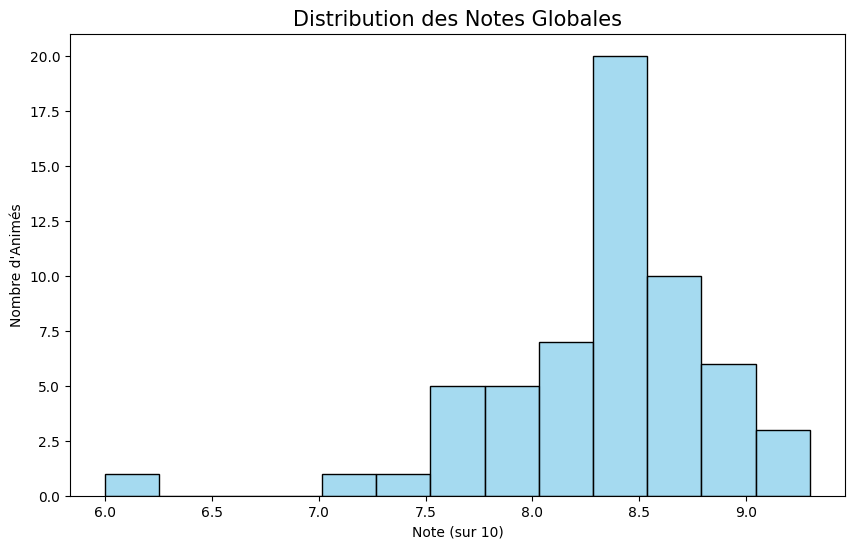

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.histplot(df['Note_Globale'], color='skyblue')

plt.title('Distribution des Notes Globales', fontsize=15)
plt.xlabel('Note (sur 10)')
plt.ylabel('Nombre d\'Animés')

plt.show()

On observe que la majeure partie des animés dans le dataset on leur note située entre 8 et 9. Cette concentration implique que la note globale seule n'est pas suffisante pour départager les animés.

On va maintenant observer si la normalisation de la longueur des animés a permis de lisser les animés entre eux.

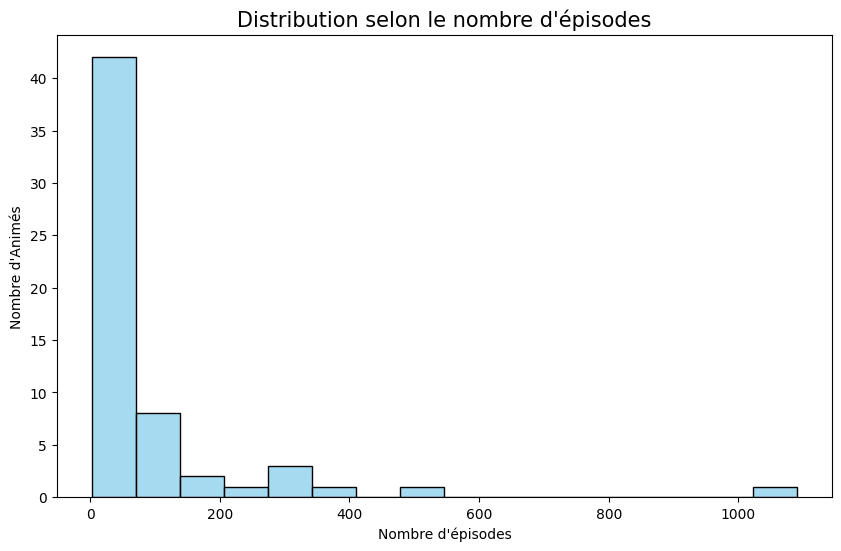

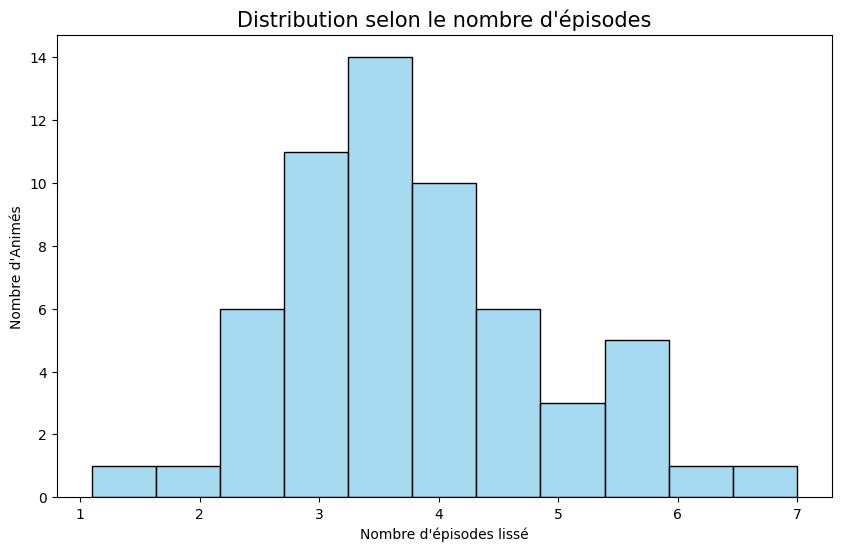

In [44]:
plt.figure(figsize=(10, 6))

sns.histplot(df['Nb_Episodes'], color='skyblue')

plt.title("Distribution selon le nombre d'épisodes" , fontsize=15)
plt.xlabel("Nombre d'épisodes")
plt.ylabel('Nombre d\'Animés')

plt.show()

plt.figure(figsize=(10, 6))

sns.histplot(df['Longueur'], color='skyblue')

plt.title("Distribution selon le nombre d'épisodes" , fontsize=15)
plt.xlabel("Nombre d'épisodes lissé")
plt.ylabel('Nombre d\'Animés')

plt.show()

On observe que le nombre d'épisodes est mieux répartit sur l'histogramme 2, ce qui nous aidera dans la création de notre score composite plus tard.

On va maintenant regarder le lien de corrélation entre la note globale et la régularité, pour observer la pertinence de ce nouveau paramètre.

On va aussi regarder s'il y a un lien entre la longueur des animés et la note globale, pour voir si les animés longs sont récompensés ou pénalisés.

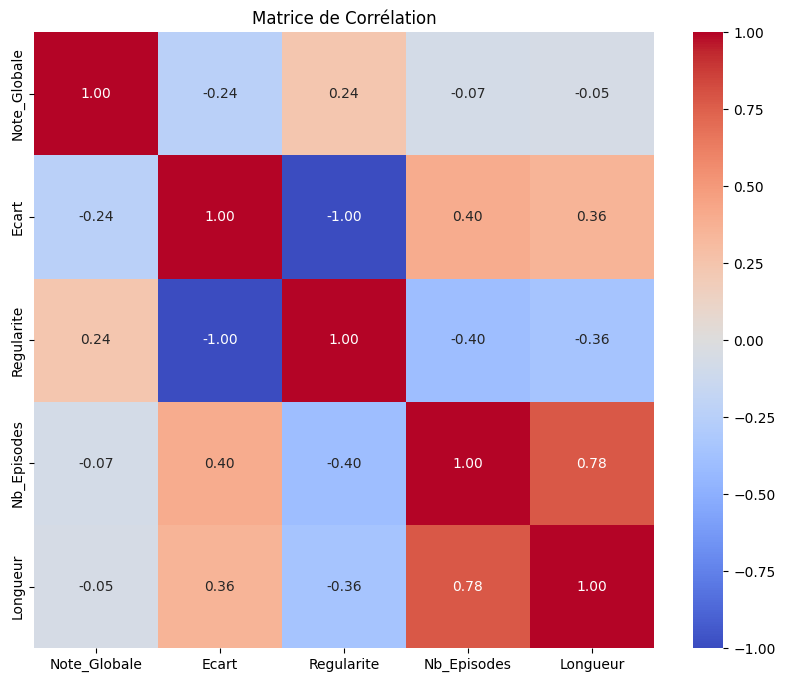

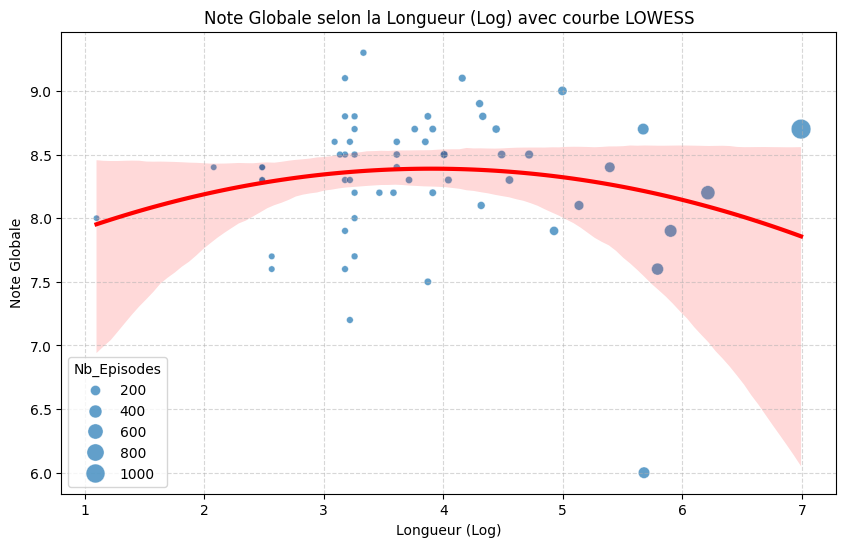

In [45]:

plt.figure(figsize=(10, 8))

cols_to_check = ['Note_Globale', 'Ecart', 'Regularite', 'Nb_Episodes', 'Longueur']
correlation_matrix = df[cols_to_check].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Matrice de Corrélation')
plt.show()

plt.figure(figsize=(10, 6))
plt.grid(True, linestyle='--', alpha=0.5)
sns.scatterplot(data=df, x='Longueur', y='Note_Globale', size='Nb_Episodes', sizes=(20, 200), alpha=0.7)
sns.regplot(data=df, x='Longueur', y='Note_Globale', scatter=False, order = 2, line_kws={'color': 'red', 'linewidth': 3})
plt.title('Note Globale selon la Longueur (Log) avec courbe LOWESS')
plt.xlabel('Longueur (Log)')
plt.ylabel('Note Globale')

plt.show()

On observe que l'indice de corrélation entre la régularité et la note globale est faiblement positive. Ils sont donc légèrement dépendants. La régularité sera donc un bon indicateur pour construire notre note compositie, car elle permettra d'avoir un autre facteur.

La note globale semble légèrement baisser plus l'animé est long.
On a fait une courbe qui suit une régression polynomiale pour révéler cette baisse.
Pour approfondir cette théorie, on va observer la régularité de ces animés.

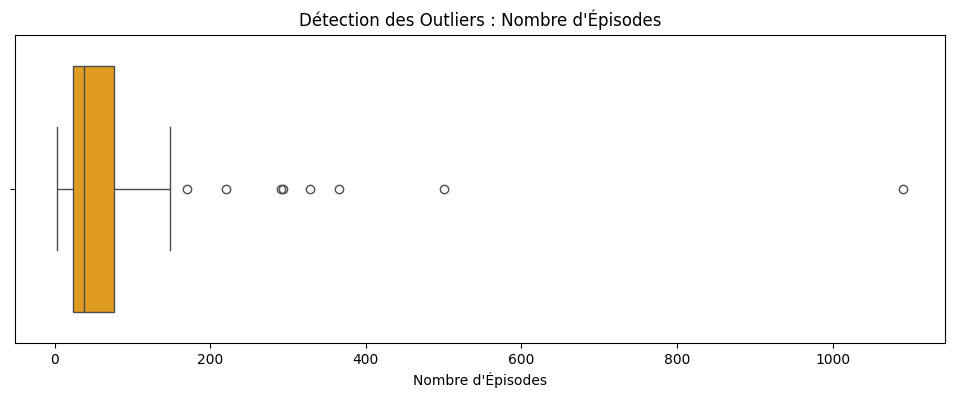

                              Anime  Nb_Episodes  Note_Globale  Regularite
8                         One Piece         1090           8.7         5.8
23                 Naruto Shippuden          500           8.2         4.6
26                           Bleach          366           7.9         5.1
52                       Fairy Tail          328           7.6         7.6
34  Boruto: Naruto Next Generations          293           6.0         4.4
2                     Dragon Ball Z          291           8.7         6.5
0                            Naruto          220           8.4         6.2
48                     Black Clover          170           8.1         3.0
19           Hunter x Hunter (2011)          148           9.0         6.2
25                 My Hero Academia          138           7.9         5.9


In [46]:
plt.figure(figsize=(12, 4))

sns.boxplot(x=df['Nb_Episodes'], color='orange')

plt.title('Détection des Outliers : Nombre d\'Épisodes')
plt.xlabel('Nombre d\'Épisodes')
plt.show()

top_longueur = df.sort_values(by='Nb_Episodes', ascending=False).head(10)

print(top_longueur[['Anime', 'Nb_Episodes', 'Note_Globale', 'Regularite']])

On voit que beaucoup de séries longues ont une régularité assez basse. Sans doute à cause d'épisodes filler ou de baisse de budget entre les productions. La qualité de l'animé est donc inégale.
Quand les animés ont plusieurs saisons, il arrive parfois qu'on y trouve des épisodes "recap", qui ne sont là que pour rappeler ce qu'il s'est passé avant. Ces épisodes ne sont jamais aimés par les fans qui les trouvent rébarbatifs et ont tendance à les noter très sévèrement.Ce qui peut biaiser la régularité.

Les épisodes recap viennent d'une époque où Youtube n'existait pas et pouvaient revêtirent une importance lorsqu'ils passaient à la télé pour rafraîchir la mémoire du spectateur.
Les animés qui en ont sont souvent des animés plus anciens qui peuvent être désavantagés par rapport aux animés plus récents qui ne le font plus.

Enfin pour valider le fait que la note globale n'est pas suffisante et que la régularité est un facteur clé, on va faire une carte des risques afin de segmenter les animés selon la moyenne globale et la régularité globale.

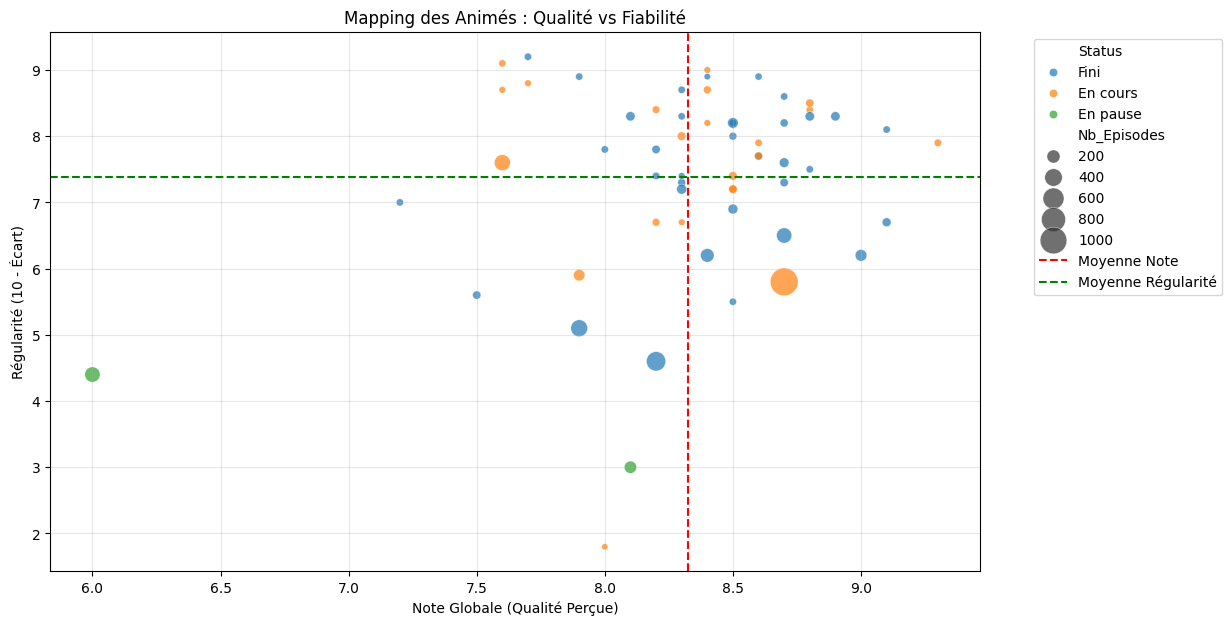

In [47]:
plt.figure(figsize=(12, 7))

sns.scatterplot(
    data=df, 
    x='Note_Globale', 
    y='Regularite', 
    hue='Status',      
    size='Nb_Episodes',
    sizes=(20, 400), 
    alpha=0.7
)

plt.axvline(x=df['Note_Globale'].mean(), color='red', linestyle='--', label='Moyenne Note')
plt.axhline(y=df['Regularite'].mean(), color='green', linestyle='--', label='Moyenne Régularité')

plt.title("Mapping des Animés : Qualité vs Fiabilité")
plt.xlabel("Note Globale (Qualité Perçue)")
plt.ylabel("Régularité (10 - Écart)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

Sur la risk map, on observe que certains animés peuvent avoir une très bonne note, mais ne pas être constant dans la qualité de leur contenu.C'est donc biaisé d'utiliser la note globale comme seul critère et ça montre que la régularité est un bon facteur dans l'élaboration de ce score composite.


## **Quatrième étape : Création d'un score composite**

Pour mieux refléter la qualité réelle qu'une note brute issue d'un agrégat, nous allons nous baser sur quatre critères : 

- La note globale
- La régularité
- La longueur
- Le statut 

Cette étude a pour but de servir une plateforme de streaming, il faut donc valoriser un programme qui fera rester le viewers plus longtemps sur la plateforme, d'où le critère de longueur dans le calcul de la note composite. 

On va aussi légèrement valoriser les animés finis, car un animé en cours peut potentiellement voir sa fin détériorer par un changement de studio, ou tout simplement être annulé en cours de production.

In [48]:
max_len = df['Longueur'].max()
df['Note_Engagement'] = (df['Longueur'] / max_len) * 10

df['Note_Status'] = df['Status'].apply(lambda x: 10 if x == 'Fini' else 0)

P_QUALITE = 0.55     
P_FIABILITE = 0.30  
P_ENGAGEMENT = 0.10  
P_STATUT = 0.05      

df['Score_Complexe'] = (
    (df['Note_Globale'] * P_QUALITE) + 
    (df['Regularite'] * P_FIABILITE) + 
    (df['Note_Engagement'] * P_ENGAGEMENT) + 
    (df['Note_Status'] * P_STATUT)
)

print("---  TOP 10  ---")
display(df[['Anime', 'Score_Complexe', 'Note_Globale', 'Status', 'Nb_Episodes']]
        .sort_values('Score_Complexe', ascending=False).head(10))

---  TOP 10  ---


,Anime,Score_Complexe,Note_Globale,Status,Nb_Episodes
42,Monster,8.500400,8.9,Fini,74
43,Hajime no Ippo,8.449213,8.8,Fini,76
21,Steins;Gate,8.389402,9.1,Fini,24
41,Your Lie in April,8.341961,8.6,Fini,22
31,Mushishi,8.330846,8.7,Fini,26
45,Yū Yū Hakusho,8.309656,8.5,Fini,112
22,GTO,8.282780,8.7,Fini,43
10,Haikyuu!!,8.200215,8.7,Fini,85
39,One Outs,8.135238,8.3,Fini,25
3,Fullmetal Alchemist: Brotherhood,8.109642,9.1,Fini,64


On va maintenant représenter visuellement la comparaison de notre score.

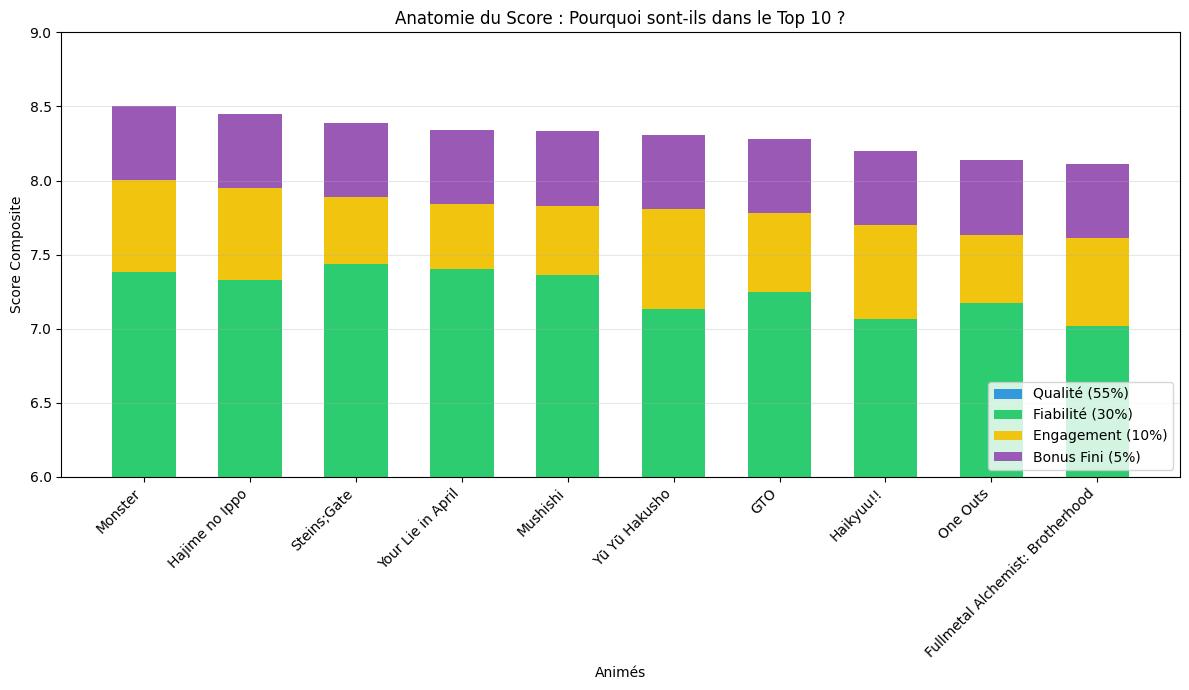

In [49]:
top_plot = df.sort_values('Score_Complexe', ascending=False).head(10).copy()
top_plot['Part_Qualité'] = top_plot['Note_Globale'] * P_QUALITE
top_plot['Part_Fiabilité'] = top_plot['Regularite'] * P_FIABILITE
top_plot['Part_Engagement'] = top_plot['Note_Engagement'] * P_ENGAGEMENT
top_plot['Part_Statut'] = top_plot['Note_Status'] * P_STATUT

plt.figure(figsize=(12, 7))
bar_width = 0.6
indices = range(len(top_plot))

p1 = plt.bar(indices, top_plot['Part_Qualité'], bar_width, label='Qualité (55%)', color='#3498db')
p2 = plt.bar(indices, top_plot['Part_Fiabilité'], bar_width, bottom=top_plot['Part_Qualité'], label='Fiabilité (30%)', color='#2ecc71')
p3 = plt.bar(indices, top_plot['Part_Engagement'], bar_width, bottom=top_plot['Part_Qualité']+top_plot['Part_Fiabilité'], label='Engagement (10%)', color='#f1c40f')
p4 = plt.bar(indices, top_plot['Part_Statut'], bar_width, bottom=top_plot['Part_Qualité']+top_plot['Part_Fiabilité']+top_plot['Part_Engagement'], label='Bonus Fini (5%)', color='#9b59b6')

plt.xlabel('Animés')
plt.ylabel('Score Composite')
plt.title('Anatomie du Score : Pourquoi sont-ils dans le Top 10 ?')
plt.xticks(indices, top_plot['Anime'], rotation=45, ha='right')
plt.ylim(6, 9) # Zoom sur le haut du panier
plt.legend(loc='lower right')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Testons la solidité de notre score en comparant le classement de notre nouveau top 5 si on modifiait certains critères :
Dans le scénario sécu, on va booster le poids de la régularité.
Dans le scénario quali, on va booster le poids de la note globale.

In [50]:
df['Score_Secu'] = (df['Note_Globale']*0.4) + (df['Regularite']*0.5) + (df['Note_Engagement']*0.05) + (df['Note_Status']*0.05)

df['Score_Quali'] = (df['Note_Globale']*0.8) + (df['Regularite']*0.1) + (df['Note_Engagement']*0.1) + (df['Note_Status']*0)

df['Rang_Expert'] = df['Score_Complexe'].rank(ascending=False)
df['Rang_Secu'] = df['Score_Secu'].rank(ascending=False)
df['Rang_Quali'] = df['Score_Quali'].rank(ascending=False)

print("\n--- TEST DE ROBUSTESSE (Sensibilité) ---")

cols_sensi = ['Anime', 'Rang_Expert', 'Rang_Secu', 'Rang_Quali']
display(df.sort_values('Score_Complexe', ascending=False).head(5)[cols_sensi])


--- TEST DE ROBUSTESSE (Sensibilité) ---


,Anime,Rang_Expert,Rang_Secu,Rang_Quali
42,Monster,1.0,2.0,2.0
43,Hajime no Ippo,2.0,4.0,7.0
21,Steins;Gate,3.0,6.0,4.0
41,Your Lie in April,4.0,1.0,17.0
31,Mushishi,5.0,3.0,14.0


On observe qu'ajouter la régularité dans le calcul du score a révélé certains animés comme "Your lie in April" ou encore "Mushishi", mais qu'il est important de bien doser l'importance de cette régularité pour ne pas suravantagé les programmes "stables".

Cependant, il est important de comprendre à quel point ces nouveaux critères on pénalisé les autres animés.

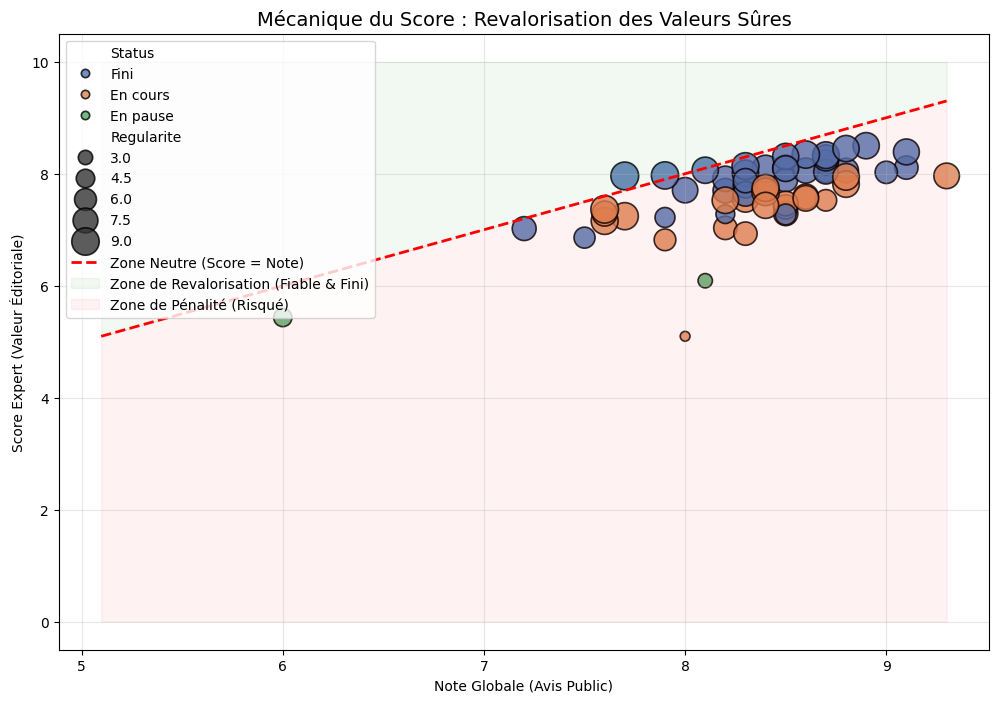

In [51]:
plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=df, 
    x='Note_Globale', 
    y='Score_Complexe', 
    hue='Status',         
    size='Regularite',    
    sizes=(50, 400),
    palette='deep',
    alpha=0.8,
    edgecolor='black'
)


lims = [df['Score_Complexe'].min(), df['Note_Globale'].max()]
plt.plot(lims, lims, color='red', linestyle='--', linewidth=2, label='Zone Neutre (Score = Note)')
plt.fill_between(lims, lims, [10, 10], color='green', alpha=0.05, label='Zone de Revalorisation (Fiable & Fini)')
plt.fill_between(lims, [0, 0], lims, color='red', alpha=0.05, label='Zone de Pénalité (Risqué)')

plt.title("Mécanique du Score : Revalorisation des Valeurs Sûres", fontsize=14)
plt.xlabel("Note Globale (Avis Public)")
plt.ylabel("Score Expert (Valeur Éditoriale)")
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()


On remarque qu'aucun animé en cours ne figure dans le top 10, le critère est donc trop discriminant. On va alléger son importance dans la note.

In [61]:
df['Note_Status'] = df['Status'].apply(lambda x: 10 if x == 'Fini' else 5)

P_QUALITE = 0.55
P_FIABILITE = 0.30
P_ENGAGEMENT = 0.10
P_STATUT = 0.05

df['Score_Complexe'] = (
    (df['Note_Globale'] * P_QUALITE) + 
    (df['Regularite'] * P_FIABILITE) + 
    (df['Note_Engagement'] * P_ENGAGEMENT) + 
    (df['Note_Status'] * P_STATUT)
)

print("--- NOUVEAU TOP 10 (Avec 'En cours' valorisé à 50%) ---")
cols_check = ['Anime', 'Score_Complexe', 'Note_Globale', 'Status', 'Nb_Episodes']
display(df[cols_check].sort_values('Score_Complexe', ascending=False).head(10))

--- NOUVEAU TOP 10 (Avec 'En cours' valorisé à 50%) ---


,Anime,Score_Complexe,Note_Globale,Status,Nb_Episodes
42,Monster,8.500400,8.9,Fini,74
43,Hajime no Ippo,8.449213,8.8,Fini,76
21,Steins;Gate,8.389402,9.1,Fini,24
41,Your Lie in April,8.341961,8.6,Fini,22
31,Mushishi,8.330846,8.7,Fini,26
45,Yū Yū Hakusho,8.309656,8.5,Fini,112
22,GTO,8.282780,8.7,Fini,43
35,Frieren: Beyond Journey's End,8.211442,9.3,En cours,28
10,Haikyuu!!,8.200215,8.7,Fini,85
51,Vinland Saga,8.193508,8.8,En cours,48


On remarque que Frieren et Vinland Saga remonte dans le top 10.

Ce score composite a donc l'air d'être plus équitable avec les animés en cours. 

On va maintenant se demander si intégrer le studio dans ce score composite pourrait être une bonne chose en analysant la moyenne de chaque studio :

In [53]:
studio_analysis = df.groupby('Studio').agg({
    'Note_Globale': ['mean', 'count']
})

studio_analysis.columns = ['Moyenne_Note', 'Nb_Animes']

relevant_studios = studio_analysis[studio_analysis['Nb_Animes'] >= 2].sort_values('Moyenne_Note', ascending=False)

print("--- CLASSEMENT DES STUDIOS (Min. 2 animés) ---")
display(relevant_studios.head(10).style.background_gradient(cmap='YlOrRd', subset=['Moyenne_Note']))


--- CLASSEMENT DES STUDIOS (Min. 2 animés) ---


,Moyenne_Note,Nb_Animes
Studio,,
Sunrise,8.750000,2
Toei Animation,8.700000,2
Wit Studio / MAPPA,8.650000,2
White Fox,8.650000,2
Madhouse,8.545455,11
Ufotable,8.500000,2
Production I.G,8.366667,3
MAPPA,8.233333,3
Bones,8.200000,5


On remarque que bien ce facteur pourrait complexifier le score, il représente de trop gros risque d'avantager un bon studio qui produirait un mauvais animé. Et encore plus de pénaliser un petit studio qui produirait une pépite. On gardera donc les studios pour la suite.

Nous validons le Score Éditorial V2 comme métrique de référence.

Ce modèle pondère la note globale avec la régularité et la longueur, tout en restant juste avec les séries en cours via un bonus modéré. Nous avons écarté le studio et le genre du calcul pour éviter tout biais de notoriété qui fausserait les résultats.

Le tableau ci-dessous permet de visualiser concrètement l'impact de ce choix : il compare notre Top 10 final avec la note globale "brute" que ces animés avaient initialement. On y observe clairement comment le score rebat les cartes en faveur des œuvres les plus fiables.

In [54]:
top_final = df.sort_values('Score_Complexe', ascending=False).head(10)[['Anime', 'Score_Complexe', 'Note_Globale']].copy()

top_final.columns = ['Titre', 'Score Complexe', 'Note Globale (Ancien)']

print("--- LE VERDICT : NOUVEAU CLASSEMENT ---")

display(top_final.style
    .background_gradient(cmap='Greens', subset=['Score Complexe'])
    .format({'Score Complexe': "{:.2f}", 'Note Globale (Ancien)': "{:.1f}"})
)

--- LE VERDICT : NOUVEAU CLASSEMENT ---


,Titre,Score Complexe,Note Globale (Ancien)
42,Monster,8.50,8.9
43,Hajime no Ippo,8.45,8.8
21,Steins;Gate,8.39,9.1
41,Your Lie in April,8.34,8.6
31,Mushishi,8.33,8.7
45,Yū Yū Hakusho,8.31,8.5
22,GTO,8.28,8.7
35,Frieren: Beyond Journey's End,8.21,9.3
10,Haikyuu!!,8.20,8.7
51,Vinland Saga,8.19,8.8


## **Cinquième étape : Segmentation éditoriale**

Nous allons maintenant transformer le Score Expert en catégories décisionnelles (Chef-d'œuvre, Très bon, etc.) pour faciliter le tri.

L'objectif est de segmenter le catalogue en 4 groupes distincts basés sur le score, puis de visualiser la répartition sous forme de graphique pour voir combien d'animés se classent dans chaque catégorie.

/var/folders/wp/m50yd4w16nv990rdn7rf3_z00000gn/T/ipykernel_8082/2415446737.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


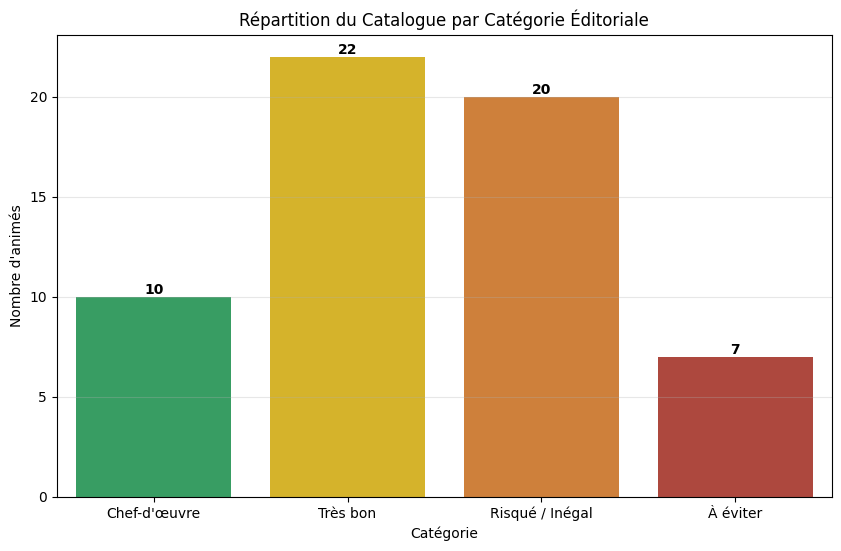

In [55]:
def definir_segment(score):
    if score >= 8.15:
        return "Chef-d'œuvre"
    elif score >= 7.8:
        return "Très bon"
    elif score >= 7.2:
        return "Risqué / Inégal"
    else:
        return "À éviter"

df['Segment_Editorial'] = df['Score_Complexe'].apply(definir_segment)


ordre_segments = ["Chef-d'œuvre", "Très bon", "Risqué / Inégal", "À éviter"]
couleurs = ['#27ae60', '#f1c40f', '#e67e22', '#c0392b']

plt.figure(figsize=(10, 6))

ax = sns.countplot(
    data=df, 
    x='Segment_Editorial', 
    order=ordre_segments, 
    palette=couleurs
)

for container in ax.containers:
    ax.bar_label(container, fontweight='bold')

plt.title("Répartition du Catalogue par Catégorie Éditoriale")
plt.xlabel("Catégorie")
plt.ylabel("Nombre d'animés")
plt.grid(axis='y', alpha=0.3) 

plt.show()

## **Sixième étape : Recommendation éditoriale**

Pour notre recommandation éditoriale, on va se baser sur les genres des animés, le studio qui les a produit et leur nouveau score.
On va effectuer un produit scalaire sur le tableau des genres (qui sont des 0 et des 1 en fonction de si oui ou non l'animé a ce genre) afin de voir les produits scalaires les plus similaires.
Puis on additionne ces critères afin de faire un score de recommandation.

In [56]:

def recommandation_sur_mesure(titre_cible, df=df, genres_split=genres_split, top_n=5):

    if titre_cible not in df['Anime'].values:
        print(f"L'animé '{titre_cible}' est introuvable dans la base.")
        return

    idx_cible = df[df['Anime'] == titre_cible].index[0]
    studio_cible = df.loc[idx_cible, 'Studio']

    vecteur_genres_cible = genres_split.iloc[idx_cible]
    
    print(f"ANALYSE : Vous avez aimé '{titre_cible}'")
    print(f"Studio : {studio_cible} | Genres : {', '.join(vecteur_genres_cible[vecteur_genres_cible == 1].index)}")
    print("-" * 60)

    score_similarite = genres_split.dot(vecteur_genres_cible)

    candidats = df.copy()
    candidats['Genres_Communs'] = score_similarite
   
    recommandations = candidats[
        (candidats['Anime'] != titre_cible) & 
        (candidats['Genres_Communs'] > 0)
    ].sort_values(
        by=['Genres_Communs', 'Score_Complexe'], 
        ascending=[False, False]
    ).head(top_n)

    cols_a_afficher = ['Anime', 'Score_Complexe', 'Genres_Communs', 'Studio', 'Segment_Editorial']
    
    print(f"TOP {top_n} RECOMMANDATIONS (Triées par Pertinence Genre puis Qualité) :")
    
    def highlight_studio(s):
        return ['background-color: #d6eaf8' if v == studio_cible else '' for v in s]

    display(recommandations[cols_a_afficher].style
        .background_gradient(cmap='Greens', subset=['Score_Complexe']) # Vert pour la qualité
        .apply(highlight_studio, subset=['Studio']) # Bleu pour le même studio
        .format({'Score_Complexe': "{:.2f}"})
        .hide(axis='index') # On cache les index pour faire propre
    )

recommandation_sur_mesure('Naruto')

ANALYSE : Vous avez aimé 'Naruto'
Studio : Studio Pierrot | Genres : Action, Shonen
------------------------------------------------------------
TOP 5 RECOMMANDATIONS (Triées par Pertinence Genre puis Qualité) :


Anime,Score_Complexe,Genres_Communs,Studio,Segment_Editorial
Dragon Ball Z,8.05,2,Toei Animation,Très bon
Naruto Shippuden,7.28,2,Studio Pierrot,Risqué / Inégal
Boruto: Naruto Next Generations,5.68,2,Studio Pierrot,À éviter
One Outs,8.14,1,Madhouse,Très bon
Kuroko's Basket,8.06,1,Production I.G,Très bon


On remarque que bien que les genres et le studio sont respectés dans la recommendaition, ils prennent trop de place par rapport à la note.
On ne peut pas se permettre de recommander des animés à éviter à notre audience.
On va donc ajuster notre fonction afin qu'elle exclue les animés "à éviter".

In [57]:
def recommandation_intelligente(titre_cible, df=df, genres_split=genres_split, top_n=5):

    if titre_cible not in df['Anime'].values:
        print(f"L'animé '{titre_cible}' est introuvable.")
        return

    col_score = 'Score_Complexe' if 'Score_Complexe' in df.columns else 'Score_Expert'

    idx_cible = df[df['Anime'] == titre_cible].index[0]
    studio_cible = df.loc[idx_cible, 'Studio']
    vecteur_genres_cible = genres_split.iloc[idx_cible]
    
    print(f"ANALYSE : Vous avez aimé '{titre_cible}'")
    print(f"(On cherche des animés similaires, mais on exclut les 'À éviter')")
    print("-" * 60)

    score_similarite = genres_split.dot(vecteur_genres_cible)

    candidats = df.copy()
    candidats['Genres_Communs'] = score_similarite

    candidats['Score_Final_Reco'] = candidats['Genres_Communs'] + candidats[col_score]

    masque_filtre = (
        (candidats['Anime'] != titre_cible) & 
        (candidats['Genres_Communs'] > 0) & 
        (~candidats['Segment_Editorial'].str.contains('éviter', case=False)) 
    )

    recommandations = candidats[masque_filtre].sort_values(
        by='Score_Final_Reco', 
        ascending=False
    ).head(top_n)


    cols_a_afficher = ['Anime', col_score, 'Genres_Communs', 'Segment_Editorial']
    
    print(f"TOP {top_n} RECOMMANDATIONS FIABLES :")
    
    display(recommandations[cols_a_afficher].style
        .background_gradient(cmap='Greens', subset=[col_score])
        .format({col_score: "{:.2f}"})
        .hide(axis='index')
    )

recommandation_intelligente('Naruto')

ANALYSE : Vous avez aimé 'Naruto'
(On cherche des animés similaires, mais on exclut les 'À éviter')
------------------------------------------------------------
TOP 5 RECOMMANDATIONS FIABLES :


Anime,Score_Complexe,Genres_Communs,Segment_Editorial
Dragon Ball Z,8.05,2,Très bon
Naruto Shippuden,7.28,2,Risqué / Inégal
One Outs,8.14,1,Très bon
Kuroko's Basket,8.06,1,Très bon
Hunter x Hunter (2011),8.02,1,Très bon


## **Septième étape : Récupération de la base de données nettoyée**

In [58]:
df.to_csv('animes_final_clean.csv', index=False, encoding='utf-8-sig')

print("Fichier 'animes_final_clean.csv' généré avec succès !")

Fichier 'animes_final_clean.csv' généré avec succès !


## **Huitième étape : Classification**

📊 Seuil de succès (Médiane) : 8.4/10
🧠 L'IA analyse maintenant 63 critères différents (dont les studios).


/var/folders/wp/m50yd4w16nv990rdn7rf3_z00000gn/T/ipykernel_8082/675370948.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Critère', data=feature_importance, palette='viridis')


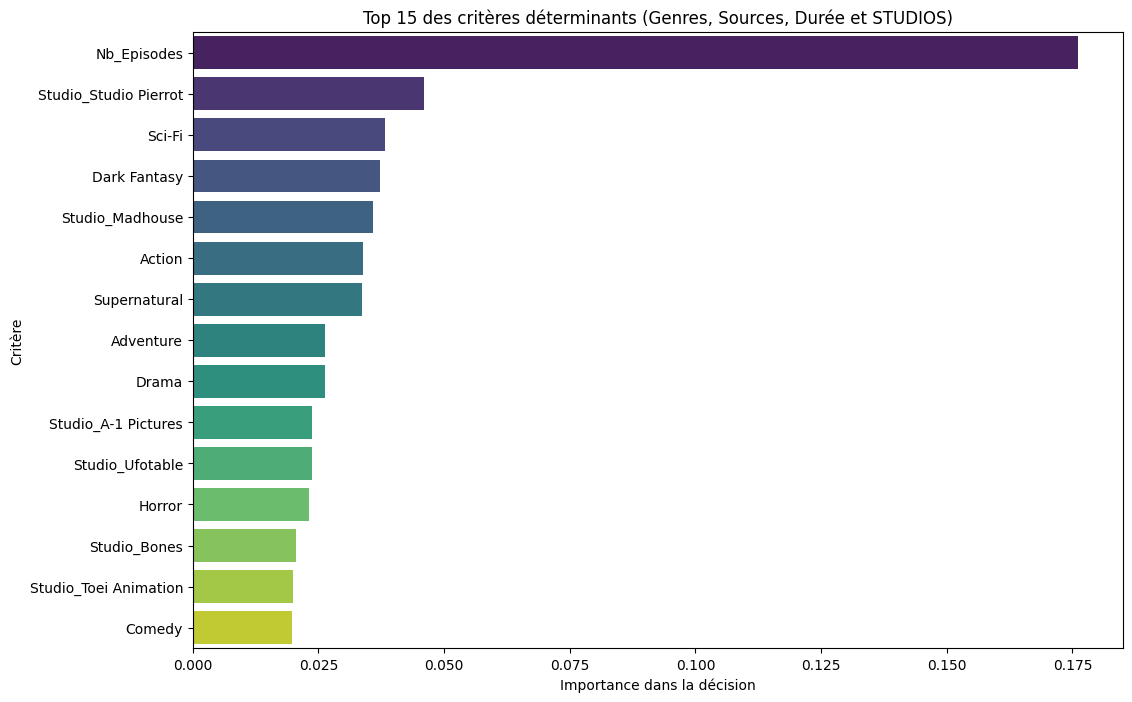

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 1. On définit le Succès (Toujours avec la Médiane pour avoir un graph visible)
seuil_difficile = df['Note_Globale'].median()
print(f"📊 Seuil de succès (Médiane) : {seuil_difficile}/10")
df['Is_Hit'] = (df['Note_Globale'] >= seuil_difficile).astype(int)

# --- 2. PRÉPARATION DES DONNÉES (FEATURES) ---

# A. Les Genres
X_genres = df['Genre_Tags'].str.get_dummies(sep=' / ')

# B. La Source
X_source = pd.get_dummies(df['Source'], prefix='Source')

# C. Le Nombre d'épisodes
X_stats = df[['Nb_Episodes']].fillna(0)

# D. --- NOUVEAU : LES STUDIOS ---
# On transforme chaque Studio en une colonne mathématique (0 ou 1)
# prefix='Studio' permet d'avoir des colonnes nommées "Studio_Madhouse", "Studio_MAPPA"...
X_studios = pd.get_dummies(df['Studio'], prefix='Studio')

# E. Assemblage Final
# On colle tout ensemble : Genres + Sources + Stats + Studios
X = pd.concat([X_genres, X_source, X_stats, X_studios], axis=1)
y = df['Is_Hit']

print(f"🧠 L'IA analyse maintenant {X.shape[1]} critères différents (dont les studios).")

# --- 3. ENTRAÎNEMENT ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- 4. VISUALISATION ---
# On regarde le Top 15 pour laisser une chance aux Studios d'apparaître
feature_importance = pd.DataFrame({
    'Critère': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False).head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Critère', data=feature_importance, palette='viridis')
plt.title('Top 15 des critères déterminants (Genres, Sources, Durée et STUDIOS)')
plt.xlabel('Importance dans la décision')
plt.show()

On remarque que le nombre d'épisodes semble être le critère le plus déterminant pour savoir si un animé sera un succès ou non. Il se pourrait donc qu'il existe un format "parfait" qui maximise les chances de faire un banger.